In [1]:
import cptac
import numpy as np
import pandas as pd
from gprofiler import GProfiler
import seaborn as sns
import matplotlib.pyplot as plt

cptac warning: Your version of cptac (0.8.8) is out-of-date. Latest is 0.9.0. Please run 'pip install --upgrade cptac' to update it. (<ipython-input-1-1cd1c7874502>, line 1)


In [2]:
permutation_df = pd.read_csv('data/full_10k_permutation_corrected.csv')
correlation_df = pd.read_csv('data/corr_diff.csv')
regression_df = pd.read_csv('data/regressions_data.csv')

In [3]:
permutation_df = pd.melt(permutation_df, id_vars='Cancer', var_name = 'Gene', value_name = 'perm_pval')

In [4]:
correlation_df = correlation_df.melt(id_vars='Cancer', var_name='Gene', value_name='delta_corr') 

In [5]:
regression_df = regression_df.rename(columns={'gene': 'Gene', 'cancer': 'Cancer'})
regression_df = regression_df[['Cancer', 'Gene', 'interaction_coeff', 'interaction_pval']]

In [6]:
df = pd.merge(permutation_df, correlation_df, how = 'outer')
df = pd.merge(df, regression_df, how = 'outer')

In [7]:
background_genes = list(pd.unique(df.Gene))
len(background_genes)

13670

In [8]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.perm_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_perm_df = pd.DataFrame(rows)
sig_perm_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAAS,0.029511,0.383641,0.478558,0.310070,0.478558
1,AAGAB,0.000010,0.513239,0.744205,0.099849,0.744205
2,AAK1,0.000017,0.539893,0.468512,0.058654,0.468512
3,AAMP,0.007805,0.422332,0.834418,0.051275,0.834418
4,AARS,0.007671,0.443220,0.588859,0.273249,0.588859
...,...,...,...,...,...,...
3803,ZSCAN18,0.009996,0.461501,0.204678,0.498252,0.204678
3804,ZW10,0.001301,0.481355,0.596254,0.095312,0.596254
3805,ZWILCH,0.000030,0.775549,1.843545,0.101584,1.843545
3806,ZWINT,0.001874,0.854401,0.988399,0.001941,0.988399


In [9]:
rows = []
for gene in pd.unique(df.Gene):
    row = {}
    gene_df = df[df.Gene == gene]
    gene_df = gene_df[gene_df.interaction_pval <= 0.05]
    if len(gene_df) > 2:
        row['Gene'] = gene
        row['perm_pval'] = np.mean(gene_df.perm_pval)
        row['delta_corr'] = np.mean(gene_df.delta_corr)
        row['interaction_coeff'] = np.mean(gene_df.interaction_coeff)
        row['interaction_pval'] = np.mean(gene_df.interaction_pval)
        row['abs_interaction_coeff'] = abs(np.mean(gene_df.interaction_coeff))
        rows.append(row)
sig_regression_df = pd.DataFrame(rows)
sig_regression_df

,Gene,perm_pval,delta_corr,interaction_coeff,interaction_pval,abs_interaction_coeff
0,AAK1,2.187208e-09,0.539893,0.453549,0.005085,0.453549
1,AARS2,1.575518e-01,0.399337,0.719068,0.015352,0.719068
2,AASDHPPT,4.554894e-09,0.569367,0.850032,0.001351,0.850032
3,AASS,9.059842e-08,0.516246,1.079797,0.015262,1.079797
4,ABCB10,2.677682e-02,0.345190,1.149501,0.013915,1.149501
...,...,...,...,...,...,...
1364,ZNF638,2.620840e-04,0.647382,1.012607,0.002426,1.012607
1365,ZNF687,5.961230e-04,0.622238,0.797145,0.014088,0.797145
1366,ZNFX1,6.527134e-02,0.420009,0.388419,0.005495,0.388419
1367,ZNHIT2,5.211000e-05,0.664401,0.756881,0.000306,0.756881


In [10]:
gp = GProfiler(return_dataframe=True)

In [11]:
sig_perm_unranked = pd.unique(sig_perm_df.Gene)
sig_perm_df = sig_perm_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_perm_slope = pd.unique(sig_perm_df.Gene)
sig_perm_upregulated = sig_perm_df[sig_perm_df.interaction_coeff >= 0]
sig_perm_upregulated_unranked = pd.unique(sig_perm_upregulated.Gene)
sig_perm_upregulated = sig_perm_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_perm_upregulated = pd.unique(sig_perm_upregulated.Gene)
sig_perm_downregulated = sig_perm_df[sig_perm_df.interaction_coeff <= 0]
sig_perm_downregulated_unranked = pd.unique(sig_perm_downregulated.Gene)
sig_perm_downregulated = sig_perm_downregulated.sort_values(by = 'interaction_coeff')
sig_perm_downregulated = pd.unique(sig_perm_downregulated.Gene)

In [12]:
sig_perm_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO'])

In [13]:
sig_perm_slope = gp.profile(organism='hsapiens', query = list(sig_perm_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO'])

In [14]:
sig_perm_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO'])

In [15]:
sig_perm_upregulated = gp.profile(organism='hsapiens', query = list(sig_perm_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO'])

In [16]:
sig_perm_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO'])

In [17]:
sig_perm_downregulated = gp.profile(organism='hsapiens', query = list(sig_perm_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO'])

In [18]:
sig_regression_unranked = pd.unique(sig_regression_df.Gene)
sig_regression_df = sig_regression_df.sort_values(by = 'abs_interaction_coeff', ascending = False)
sig_regression_slope = pd.unique(sig_regression_df.Gene)
sig_regression_upregulated = sig_regression_df[sig_regression_df.interaction_coeff >= 0]
sig_regression_upregulated_unranked = pd.unique(sig_regression_upregulated.Gene)
sig_regression_upregulated = sig_regression_upregulated.sort_values(by = 'interaction_coeff', ascending = False)
sig_regression_upregulated = pd.unique(sig_regression_upregulated.Gene)
sig_regression_downregulated = sig_regression_df[sig_regression_df.interaction_coeff <= 0]
sig_regression_downregulated_unranked = pd.unique(sig_regression_downregulated.Gene)
sig_regression_downregulated = sig_regression_downregulated.sort_values(by = 'interaction_coeff')
sig_regression_downregulated = pd.unique(sig_regression_downregulated.Gene)

In [19]:
sig_regression_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO'])

In [20]:
sig_regression_slope = gp.profile(organism='hsapiens', query = list(sig_regression_slope), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO'])

In [21]:
sig_regression_upregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO'])

In [22]:
sig_regression_upregulated = gp.profile(organism='hsapiens', query = list(sig_regression_upregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['GO'])

In [23]:
sig_regression_downregulated_unranked = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated_unranked), no_iea=True,
                       ordered=False, no_evidences=False, background= background_genes, sources = ['GO'])

In [24]:
sig_regression_downregulated = gp.profile(organism='hsapiens', query = list(sig_regression_downregulated), no_iea=True,
                       ordered=True, no_evidences=False, background= background_genes, sources = ['KEGG'])

In [25]:
sig_perm_unranked['Analysis'] = ['perm_unranked'] * len(sig_perm_unranked)
sig_perm_slope['Analysis'] = ['perm_slope'] * len(sig_perm_slope)
sig_perm_upregulated_unranked['Analysis'] = ['perm_upregulated_unranked'] * len(sig_perm_upregulated_unranked)
sig_perm_upregulated['Analysis'] = ['perm_upregulated'] * len(sig_perm_upregulated)
sig_perm_downregulated_unranked['Analysis'] = ['perm_downregulated_unranked'] * len(sig_perm_downregulated_unranked)
sig_perm_downregulated['Analysis'] = ['perm_downregulated'] * len(sig_perm_downregulated)

In [26]:
sig_regression_unranked['Analysis'] = ['regression_unranked'] * len(sig_regression_unranked)
sig_regression_slope['Analysis'] = ['regression_slope'] * len(sig_regression_slope)
sig_regression_upregulated_unranked['Analysis'] = ['regression_upregulated_unranked'] * len(sig_regression_upregulated_unranked)
sig_regression_upregulated['Analysis'] = ['regression_upregulated'] * len(sig_regression_upregulated)
sig_regression_downregulated_unranked['Analysis'] = ['regression_downregulated_unranked'] * len(sig_regression_downregulated_unranked)
sig_regression_downregulated['Analysis'] = ['regression_downregulated'] * len(sig_regression_downregulated)

In [27]:
upregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_upregulated_unranked,sig_perm_upregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_upregulated_unranked,sig_regression_upregulated]

In [28]:
upregulated_pathways_df = pd.concat(upregulated_pathways)
upregulated_pathways_df

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences,Analysis
0,GO:CC,GO:0005737,cytoplasm,2.054960e-50,True,"""All of the contents of a cell excluding the p...",8617,3746,2763,13575,0.737587,0.320645,query_1,"[GO:0005622, GO:0110165]","[AAAS, AAGAB, AAK1, AAMP, AARS2, AASDHPPT, AAS...","[[IDA], [IDA], [ISS, IBA, TAS], [IDA, IBA], [I...",perm_unranked
1,GO:CC,GO:0005829,cytosol,2.736190e-40,True,"""The part of the cytoplasm that does not conta...",4425,3746,1568,13575,0.418580,0.354350,query_1,"[GO:0005737, GO:0110165]","[AAAS, AAGAB, AAK1, AAMP, AASDHPPT, AASS, ABCB...","[[IDA], [IDA], [TAS], [IDA, IBA], [IDA, TAS], ...",perm_unranked
2,GO:MF,GO:0003824,catalytic activity,3.665954e-36,True,"""Catalysis of a biochemical reaction at physio...",4198,3746,1484,13575,0.396156,0.353502,query_1,[GO:0003674],"[AAK1, AARS2, AASDHPPT, AASS, ABAT, ABCA3, ABC...","[[ISS, IBA, TAS], [IMP, IBA], [IDA, IBA, TAS],...",perm_unranked
3,GO:CC,GO:0005622,intracellular anatomical structure,1.610549e-33,True,"""A component of a cell contained within (but n...",10798,3746,3242,13575,0.865456,0.300241,query_1,[GO:0110165],"[AAAS, AAGAB, AAK1, AAMP, AARS2, AASDHPPT, AAS...","[[IDA, HDA, IBA, TAS], [IDA], [ISS, IBA, TAS],...",perm_unranked
4,GO:CC,GO:0043227,membrane-bounded organelle,2.493146e-21,True,"""Organized structure of distinctive morphology...",9273,3746,2810,13575,0.750133,0.303030,query_1,[GO:0043226],"[AAAS, AAGAB, AAK1, AARS2, AASDHPPT, AASS, ABA...","[[IDA, HDA, IBA, TAS], [IDA], [ISS], [IDA, IBA...",perm_unranked
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,GO:BP,GO:0009451,RNA modification,1.825347e-02,True,"""The covalent alteration of one or more nucleo...",131,695,24,13575,0.034532,0.183206,query_1,"[GO:0016070, GO:0043412]","[TFB2M, TFB1M, TRMT5, NSUN2, TRIT1, MRM1, TRMT...","[[IBA], [IBA, TAS], [IMP, IBA], [IDA, IBA, TAS...",regression_upregulated
26,GO:BP,GO:1902850,microtubule cytoskeleton organization involved...,2.257544e-02,True,"""Any microtubule cytoskeleton organization tha...",127,308,15,13575,0.048701,0.118110,query_1,"[GO:0000226, GO:1903047]","[PLK1, BCCIP, RACGAP1, KIFC1, CCNB1, TPX2, PRC...","[[IDA], [IMP], [IDA], [IMP, IBA], [IMP], [IDA,...",regression_upregulated
27,GO:CC,GO:0005759,mitochondrial matrix,3.047388e-02,True,"""The gel-like material, with considerable fine...",400,451,35,13575,0.077605,0.087500,query_1,"[GO:0005739, GO:0043233, GO:0070013]","[TFB2M, TFB1M, LRPPRC, SUPV3L1, NDUFAF7, TRMT5...","[[IDA, IBA, TAS], [IDA, IBA, TAS], [IDA], [IDA...",regression_upregulated
28,GO:BP,GO:0051987,positive regulation of attachment of spindle m...,3.557296e-02,True,"""Any process that activates or increases the f...",6,203,4,13575,0.019704,0.666667,query_1,"[GO:0008608, GO:0051984, GO:0051988, GO:0090068]","[CCNB1, AURKB, HNRNPU, RCC2]","[[IMP], [IDA], [IMP, IBA], [IMP]]",regression_upregulated


In [29]:
upregulated_pathways_df['p_value'] = -np.log10(upregulated_pathways_df['p_value'])

Text(0.5, 0, '-log10 p-value')

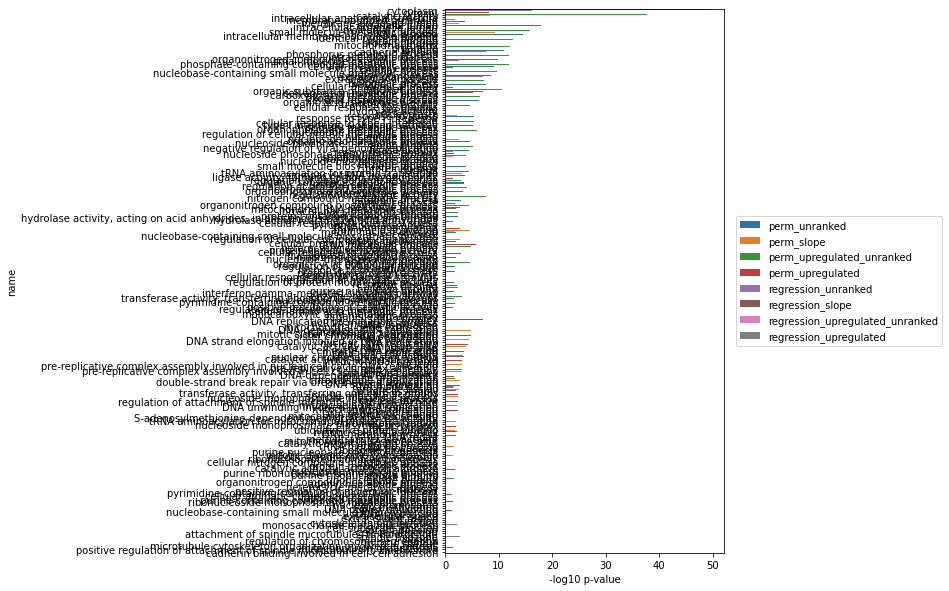

In [30]:
plt.figure(figsize=(5,10))
g = sns.barplot(data = upregulated_pathways_df,
               x = 'p_value', y = 'name', hue = 'Analysis')
g.legend(loc='center right', bbox_to_anchor=(1.8, .5))
plt.xlabel('-log10 p-value')

In [31]:
num_upregulated_analyses = len(pd.unique(upregulated_pathways_df.Analysis))

In [32]:
pd.set_option('display.max_colwidth', -1)

<ipython-input-32-0891b765a168>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [33]:
upregulated_pathways = []
upregulated_analyses = []
for pathway in pd.unique(upregulated_pathways_df.name):
    pathway_df = upregulated_pathways_df[upregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in upregulated_analyses:
        upregulated_analyses.append(analyses)
        upregulated_pathways.append({pathway})
    else:
        i = upregulated_analyses.index(analyses)
        upregulated_pathways[i].add(pathway)
upregulated_pathways_df = pd.DataFrame({'Analyses':upregulated_analyses, 'Pathways': upregulated_pathways})
upregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_upregulated_analyses for a in upregulated_pathways_df.Analyses]
upregulated_pathways_df = upregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
upregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
8,"{perm_unranked, perm_slope, perm_upregulated, regression_upregulated_unranked, regression_unranked, regression_slope, regression_upregulated, perm_upregulated_unranked}","{cell adhesion molecule binding, cadherin binding}",1.000
16,"{perm_unranked, perm_slope, perm_upregulated, regression_upregulated_unranked, regression_slope, regression_upregulated, perm_upregulated_unranked}","{mitotic nuclear division, mitotic cell cycle}",0.875
1,"{perm_unranked, perm_slope, perm_upregulated, regression_upregulated_unranked, regression_unranked, regression_slope, perm_upregulated_unranked}",{cytosol},0.875
14,"{perm_unranked, perm_slope, perm_upregulated, regression_slope, regression_upregulated, perm_upregulated_unranked}","{mitotic cell cycle process, mitochondrial RNA metabolic process}",0.750
4,"{perm_unranked, perm_slope, perm_upregulated, regression_upregulated_unranked, regression_unranked, perm_upregulated_unranked}",{small molecule metabolic process},0.750
23,"{perm_slope, perm_upregulated, regression_slope, regression_upregulated, perm_upregulated_unranked}","{sister chromatid segregation, organelle fission, transferase activity, transferring one-carbon groups}",0.625
22,"{perm_slope, perm_upregulated, regression_upregulated_unranked, regression_slope, regression_upregulated}",{mitotic sister chromatid segregation},0.625
5,"{perm_unranked, perm_slope, perm_upregulated, regression_upregulated_unranked, perm_upregulated_unranked}",{RNA binding},0.625
7,"{perm_unranked, perm_slope, perm_upregulated, regression_upregulated, perm_upregulated_unranked}",{mitochondrial matrix},0.625
9,"{perm_unranked, perm_slope, perm_upregulated, regression_unranked, perm_upregulated_unranked}",{small molecule catabolic process},0.625


In [34]:
rows = []
for index, row in upregulated_pathways_df.iterrows():
    pathways = row.Pathways
    for pathway in pathways:
        new_row = dict()
        new_row['Pathway'] = pathway
        new_row['Frequency'] = row.Pathway_Frequency
        rows.append(new_row)
upregulated_pathways_df = pd.DataFrame(rows)
upregulated_pathways_df

,Pathway,Frequency
0,cell adhesion molecule binding,1.000
1,cadherin binding,1.000
2,mitotic nuclear division,0.875
3,mitotic cell cycle,0.875
4,cytosol,0.875
...,...,...
234,"catalytic activity, acting on a protein",0.125
235,ribonucleotide binding,0.125
236,purine nucleobase metabolic process,0.125
237,mitochondrion organization,0.125


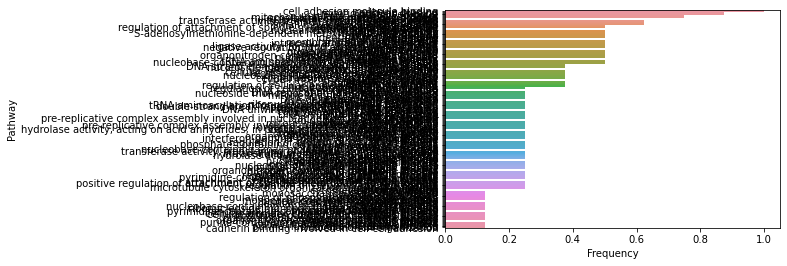

In [35]:
axes = sns.barplot(data = upregulated_pathways_df, y = 'Pathway', x = 'Frequency')


In [36]:
downregulated_pathways = [sig_perm_unranked, sig_perm_slope,sig_perm_downregulated_unranked,sig_perm_downregulated,sig_regression_unranked,sig_regression_slope,
                       sig_regression_downregulated_unranked,sig_regression_downregulated]
downregulated_pathways_df = pd.concat(downregulated_pathways)
num_downregulated_analyses = len(pd.unique(downregulated_pathways_df.Analysis))

In [37]:
downregulated_pathways = []
downregulated_analyses = []
for pathway in pd.unique(downregulated_pathways_df.name):
    pathway_df = downregulated_pathways_df[downregulated_pathways_df.name == pathway]
    analyses = set(pathway_df.Analysis)
    if analyses not in downregulated_analyses:
        downregulated_analyses.append(analyses)
        downregulated_pathways.append({pathway})
    else:
        i = downregulated_analyses.index(analyses)
        downregulated_pathways[i].add(pathway)
downregulated_pathways_df = pd.DataFrame({'Analyses':downregulated_analyses, 'Pathways': downregulated_pathways})
downregulated_pathways_df['Pathway_Frequency'] = [len(a) / num_downregulated_analyses for a in downregulated_pathways_df.Analyses]
downregulated_pathways_df = downregulated_pathways_df.sort_values(by = 'Pathway_Frequency', ascending = False)
downregulated_pathways_df

,Analyses,Pathways,Pathway_Frequency
5,"{perm_unranked, regression_downregulated_unranked, regression_unranked, regression_slope, perm_downregulated, perm_downregulated_unranked}",{extracellular exosome},0.750
6,"{perm_unranked, regression_downregulated_unranked, regression_unranked, perm_downregulated, perm_downregulated_unranked}","{extracellular vesicle, extracellular organelle}",0.625
7,"{perm_unranked, regression_downregulated_unranked, regression_unranked, perm_downregulated_unranked}",{vesicle},0.500
1,"{perm_unranked, regression_unranked, perm_slope, regression_slope}","{cell adhesion molecule binding, cytosol, cadherin binding}",0.500
12,"{regression_downregulated_unranked, regression_unranked, perm_downregulated_unranked}","{extracellular region, extracellular space}",0.375
3,"{perm_unranked, regression_unranked, perm_slope}","{small molecule catabolic process, small molecule metabolic process}",0.375
8,"{perm_unranked, perm_slope, regression_slope}","{mitotic nuclear division, mitotic cell cycle process, mitotic cell cycle, mitochondrial RNA metabolic process}",0.375
9,"{perm_unranked, regression_unranked, regression_slope}",{anchoring junction},0.375
0,"{perm_unranked, regression_unranked}","{catalytic activity, identical protein binding, molecular_function, response to stimulus, cellular_component, ion binding, cytoplasm, membrane-bounded organelle, intracellular anatomical structure, regulation of cellular component organization, response to stress, biological_process}",0.250
18,"{regression_unranked, regression_slope}","{cell-substrate junction, focal adhesion}",0.250
